In [1]:
from fastai import *
from fastai.vision.all import *

In [2]:
path = Path();path

Path('.')

In [3]:
path.ls()

(#28) [Path('.git'),Path('.gitignore'),Path('.ipynb_checkpoints'),Path('.newcat.txt.swp'),Path('.~lock.ssh-key.pub#'),Path('deploy.ipynb'),Path('deploy.py'),Path('export.pkl'),Path('label.txt'),Path('label_rename.txt')...]

In [4]:
verify_image('./Sample/992/ad1fc71a4c00ed77f3ea9ea6f7046eaf.jpg')

False

In [5]:
label_file = (path/'newcat.txt')

In [6]:
with open(label_file) as file:
    lines = file.readlines()
coding_dict = {int(x[:3]):x[3:-1] for x in lines}
coding_dict
#lines

{167: ' Cotton healthy leaf',
 169: ' Cotton anthracnose',
 170: ' Cotton blight',
 991: ' Apple Healthy leaf',
 278: ' Apple powdery mildew',
 279: ' Apple nitrogen deficiency',
 280: ' Apple Phosphorus Deficiency',
 282: ' Apple Rust',
 992: ' Grape healthy leaf',
 299: ' Grape leaf roll disease',
 300: ' Grape fan leaf disease'}

In [7]:
def directory_files(dirct: Path) -> list:
    Lf = []
    if dirct.is_dir():
        for d in dirct.iterdir():
            Lf.extend(directory_files(d))
    else:
        Lf.append(str(dirct))   
    return Lf

In [8]:
df = pd.DataFrame()

In [9]:
df['fname'] = list()
df['labels'] = list()

In [10]:
files = directory_files(path/'Sample');files

['Sample/001/download (1).jpeg',
 'Sample/001/download.jpeg',
 'Sample/001/P1020083-W1200.jpg',
 'Sample/001/stock-photo-nature-fruit-apple-green-salad-grey-leaves-healthy-background-c51046d3-3361-4624-b636-9c5846a7164b.jpg',
 'Sample/100/DSC05819.JPG',
 'Sample/100/DSC05982.JPG',
 'Sample/100/DSC06018.JPG',
 'Sample/100/DSC06024.JPG',
 'Sample/100/DSC06040.JPG',
 'Sample/100/DSC06089.JPG',
 'Sample/100/DSC06095.JPG',
 'Sample/100/DSC06175.JPG',
 'Sample/100/DSC06178.JPG',
 'Sample/100/DSC06237.JPG',
 'Sample/101/DSC03007.JPG',
 'Sample/101/DSC03015.JPG',
 'Sample/101/DSC03028.JPG',
 'Sample/101/DSC03042.JPG',
 'Sample/101/DSC03045.JPG',
 'Sample/101/DSC03048.JPG',
 'Sample/101/DSC03163.JPG',
 'Sample/101/DSC03181.JPG',
 'Sample/101/DSC03767.JPG',
 'Sample/101/DSC03830.JPG',
 'Sample/102/DSC00770.JPG',
 'Sample/102/DSC00795.JPG',
 'Sample/102/DSC00890.JPG',
 'Sample/102/DSC00894.JPG',
 'Sample/102/DSC00896.JPG',
 'Sample/102/DSC00968.JPG',
 'Sample/102/DSC04985.JPG',
 'Sample/102/DSC06

In [11]:
fname = list()
labels = list()
for file in files:
    code = int(Path(file).parent.name)
    if code in coding_dict.keys():
        if verify_image(file):
            fname.append(file)
            labels.append(coding_dict[code])
df['fname'] = fname
df['labels'] = labels

/home/akmal/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:3022: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


In [12]:
df

,fname,labels
0,Sample/167/1989a757-fb47-4950-b0f2-061672681868.jpeg,Cotton healthy leaf
1,Sample/167/ags-158889-s-5722.jpg,Cotton healthy leaf
2,Sample/167/ags-169714-d-5722.jpg,Cotton healthy leaf
3,Sample/167/cotton-leaf-tree-plant-indian-beautiful-yellow-flower-morning-image-228974057.jpg,Cotton healthy leaf
4,Sample/167/cotton-plant-flower.jpg,Cotton healthy leaf
...,...,...
1539,Sample/992/warak-arish-stuffed-grape-leaves-healthy-comfort-food-f8405482caac9e1a352f62755b16a3c8.jpg,Grape healthy leaf
1540,Sample/992/weledahippo_content414x414.jpg,Grape healthy leaf
1541,Sample/992/weledahippo_content736x414.jpg,Grape healthy leaf
1542,Sample/992/weledahippo_content992x558.jpg,Grape healthy leaf


In [13]:
dls = ImageDataLoaders.from_df(df, 
                               path,
                               item_tfms=Resize(256), 
                               batch_tfms=[*aug_transforms(size=244, min_scale=0.75,
                                                          max_rotate=25, flip_vert=True),
                               Normalize.from_stats(*imagenet_stats)],
                               bs=64,
                              )

# dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
#                    get_items=get_image_files,
#                    get_y=parent_label,
#                    item_tfms=Resize(460),
#                    batch_tfms=[*aug_transforms(size=size, min_scale=0.75),
#                                Normalize.from_stats(*imagenet_stats)])

/home/akmal/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [14]:
aug_transforms??

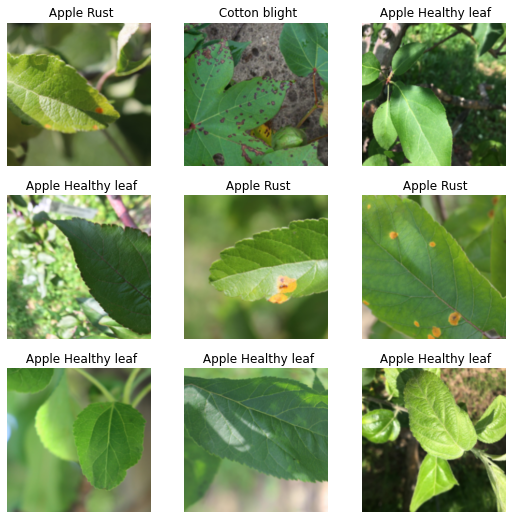

In [15]:
dls.show_batch()

In [16]:
learn = cnn_learner(dls, resnet34, metrics=accuracy, 
                    loss_func=CrossEntropyLossFlat(),cbs=MixUp())

/home/akmal/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [17]:
#learn.lr_find()

In [18]:
learn.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,time
0,3.085471,0.849539,0.746753,00:07


epoch,train_loss,valid_loss,accuracy,time
0,1.854724,0.733251,0.779221,00:08
1,1.767159,0.540542,0.840909,00:07
2,1.618068,0.484562,0.853896,00:08
3,1.488124,0.482397,0.866883,00:08
4,1.337138,0.459556,0.876623,00:08
5,1.217782,0.458733,0.879870,00:07
6,1.117908,0.456484,0.905844,00:08
7,1.025179,0.382539,0.886364,00:07
8,0.942748,0.351947,0.899351,00:08
9,0.892175,0.347412,0.909091,00:07


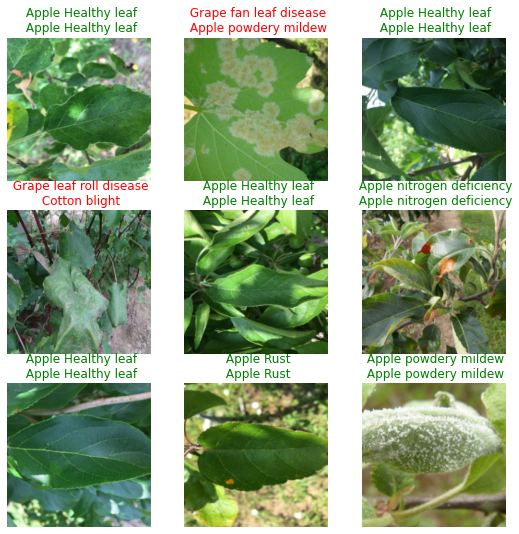

In [19]:
learn.show_results()

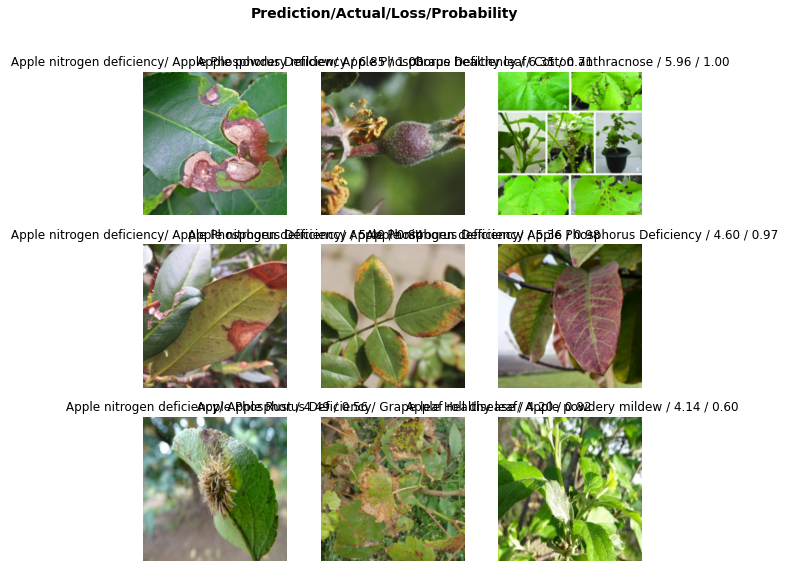

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)

In [37]:
learn.export('short-model-normalization-croppedAug-mixup.pkl')

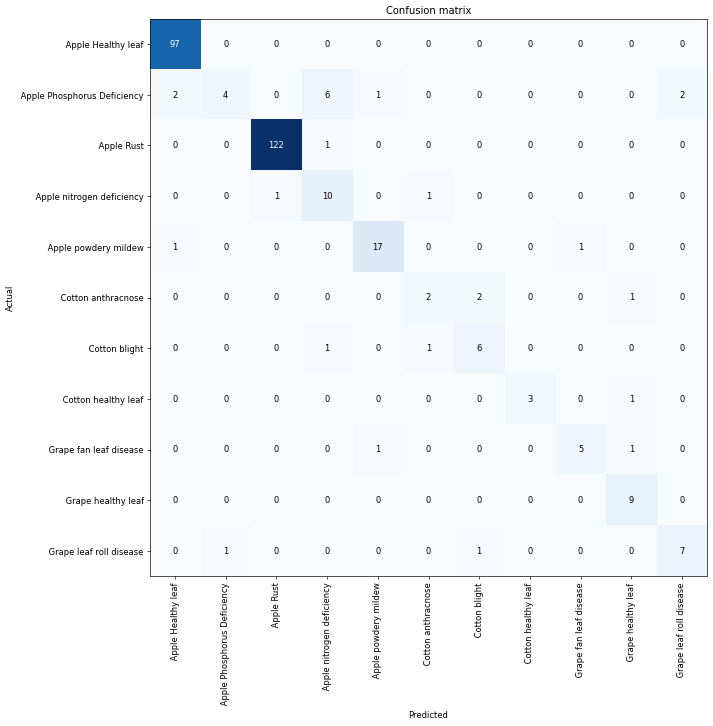

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [36]:
interp.most_confused()

[(' Apple Phosphorus Deficiency', ' Apple nitrogen deficiency', 6),
 (' Apple Phosphorus Deficiency', ' Apple Healthy leaf', 2),
 (' Apple Phosphorus Deficiency', ' Grape leaf roll disease', 2),
 (' Cotton anthracnose', ' Cotton blight', 2),
 (' Apple Phosphorus Deficiency', ' Apple powdery mildew', 1),
 (' Apple Rust', ' Apple nitrogen deficiency', 1),
 (' Apple nitrogen deficiency', ' Apple Rust', 1),
 (' Apple nitrogen deficiency', ' Cotton anthracnose', 1),
 (' Apple powdery mildew', ' Apple Healthy leaf', 1),
 (' Apple powdery mildew', ' Grape fan leaf disease', 1),
 (' Cotton anthracnose', ' Grape healthy leaf', 1),
 (' Cotton blight', ' Apple nitrogen deficiency', 1),
 (' Cotton blight', ' Cotton anthracnose', 1),
 (' Cotton healthy leaf', ' Grape healthy leaf', 1),
 (' Grape fan leaf disease', ' Apple powdery mildew', 1),
 (' Grape fan leaf disease', ' Grape healthy leaf', 1),
 (' Grape leaf roll disease', ' Apple Phosphorus Deficiency', 1),
 (' Grape leaf roll disease', ' Cott

In [23]:
df

,fname,labels
0,Sample/167/1989a757-fb47-4950-b0f2-061672681868.jpeg,Cotton healthy leaf
1,Sample/167/ags-158889-s-5722.jpg,Cotton healthy leaf
2,Sample/167/ags-169714-d-5722.jpg,Cotton healthy leaf
3,Sample/167/cotton-leaf-tree-plant-indian-beautiful-yellow-flower-morning-image-228974057.jpg,Cotton healthy leaf
4,Sample/167/cotton-plant-flower.jpg,Cotton healthy leaf
...,...,...
1539,Sample/992/warak-arish-stuffed-grape-leaves-healthy-comfort-food-f8405482caac9e1a352f62755b16a3c8.jpg,Grape healthy leaf
1540,Sample/992/weledahippo_content414x414.jpg,Grape healthy leaf
1541,Sample/992/weledahippo_content736x414.jpg,Grape healthy leaf
1542,Sample/992/weledahippo_content992x558.jpg,Grape healthy leaf


In [24]:
cotton_healthy_leaf_c = len([x for x in list(df['labels']) if x==' Cotton healthy leaf']); cotton_healthy_leaf_c

18

In [25]:
Cotton_anthracnose_c = len([x for x in list(df['labels']) if x==' Cotton anthracnose'])
Cotton_anthracnose_c

22

In [26]:
Cotton_blight_c = len([x for x in list(df['labels']) if x==' Cotton blight'])
Cotton_blight_c

50

In [27]:
Apple_Healthy_leaf = len([x for x in list(df['labels']) if x==' Apple Healthy leaf'])
Apple_Healthy_leaf

516

In [28]:
Apple_powdery_mildew = len([x for x in list(df['labels']) if x==' Apple powdery mildew'])
Apple_powdery_mildew

77

In [29]:
Apple_nitrogen_deficiency = len([x for x in list(df['labels']) if x==' Apple nitrogen deficiency'])
Apple_nitrogen_deficiency

56

In [30]:
Apple_Phosphorus_Deficiency = len([x for x in list(df['labels']) if x==' Apple Phosphorus Deficiency'])
Apple_Phosphorus_Deficiency

32

In [31]:
Apple_Rust = len([x for x in list(df['labels']) if x==' Apple Rust'])
Apple_Rust

662

In [32]:
Grape_healthy_leaf = len([x for x in list(df['labels']) if x==' Grape healthy leaf'])
Grape_healthy_leaf

33

In [33]:
Grape_roll_disease = len([x for x in list(df['labels']) if x==' Grape leaf roll disease'])
Grape_roll_disease

46

In [34]:
Grape_fan_disease = len([x for x in list(df['labels']) if x==' Grape fan leaf disease'])
Grape_fan_disease

32